# Proyek Analisis Data: Bike Sharing
- Nama: Muhammad Fakhri Febriawan
- Email: muhammadfakhri1234@gmail.com
- Id Dicoding: muhfakhri

## Menentukan Pertanyaan Bisnis

- Apakah kondisi cuaca, seperti suhu, kelembapan, atau kecepatan angin, memiliki pengaruh terhadap tingkat penyewaan sepeda? Apakah ada korelasi antara kondisi cuaca tertentu dengan jumlah penggunaan sepeda
- Bagaimana perbedaan penyewaan sepeda antara hari libur dan hari kerja ini dapat mempengaruhi strategi pemasaran atau operasional terkait dengan penyediaan sepeda selama hari libur dan hari kerja

## Menyiapkan semua library yang dibuthkan

In [1]:
#Library Manipulasi Data
import numpy as np
import pandas as pd

#import VIsualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

##Memanggil dataset

In [4]:
#Memanggil dataset
path_day_dataset = "https://raw.githubusercontent.com/fakhrimuh/BikeSharing/main/day.csv"

## Data Wrangling

### Gathering Data

In [5]:
#memanggil dataset
day_df = pd.read_csv(path_day_dataset)

####Melihat data peminjaman perharinya

In [6]:
#merlihat dataset
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
#melihat jumlah dataset ()
day_df.shape

(731, 16)

### Assessing Data

####Descriptive statistic

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


####Missing Value

In [9]:
print("Jumlah Missing Value per Kolom pada data per hari:")
print(day_df.isnull().sum())

Jumlah Missing Value per Kolom pada data per hari:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Pada kedua dataset tidak ada nilai yang hilang ataupun kosong

####Duplicate Data

In [10]:
print("Jumlah data duplikat pada data per hari:", day_df[day_df.duplicated()].shape[0])

Jumlah data duplikat pada data per hari: 0


#### Data Type

In [11]:
print('Dataframe day:')
print(day_df.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Masih adanya kesalahan tipe data pada kedua dataset dimana pada kolom dteday tipe datanya adalah object dimana seharusnya adalah datetime

### Cleaning Data

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

tidak ada data yang hilang atau kosong

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Melihat tipe data kolom dteday setelah perubahan
print("\nTipe data setelah perubahan:")
print(day_df['dteday'].dtype)

## Exploratory Data Analysis (EDA)

### Pertanyaan 1 pengaruh cuaca




####Analisis Deskriptif

Ringkasan Statistik dari Variabel Terpilih:
              temp         hum   windspeed          cnt
count  731.000000  731.000000  731.000000   731.000000
mean     0.495385    0.627894    0.190486  4504.348837
std      0.183051    0.142429    0.077498  1937.211452
min      0.059130    0.000000    0.022392    22.000000
25%      0.337083    0.520000    0.134950  3152.000000
50%      0.498333    0.626667    0.180975  4548.000000
75%      0.655417    0.730209    0.233214  5956.000000
max      0.861667    0.972500    0.507463  8714.000000


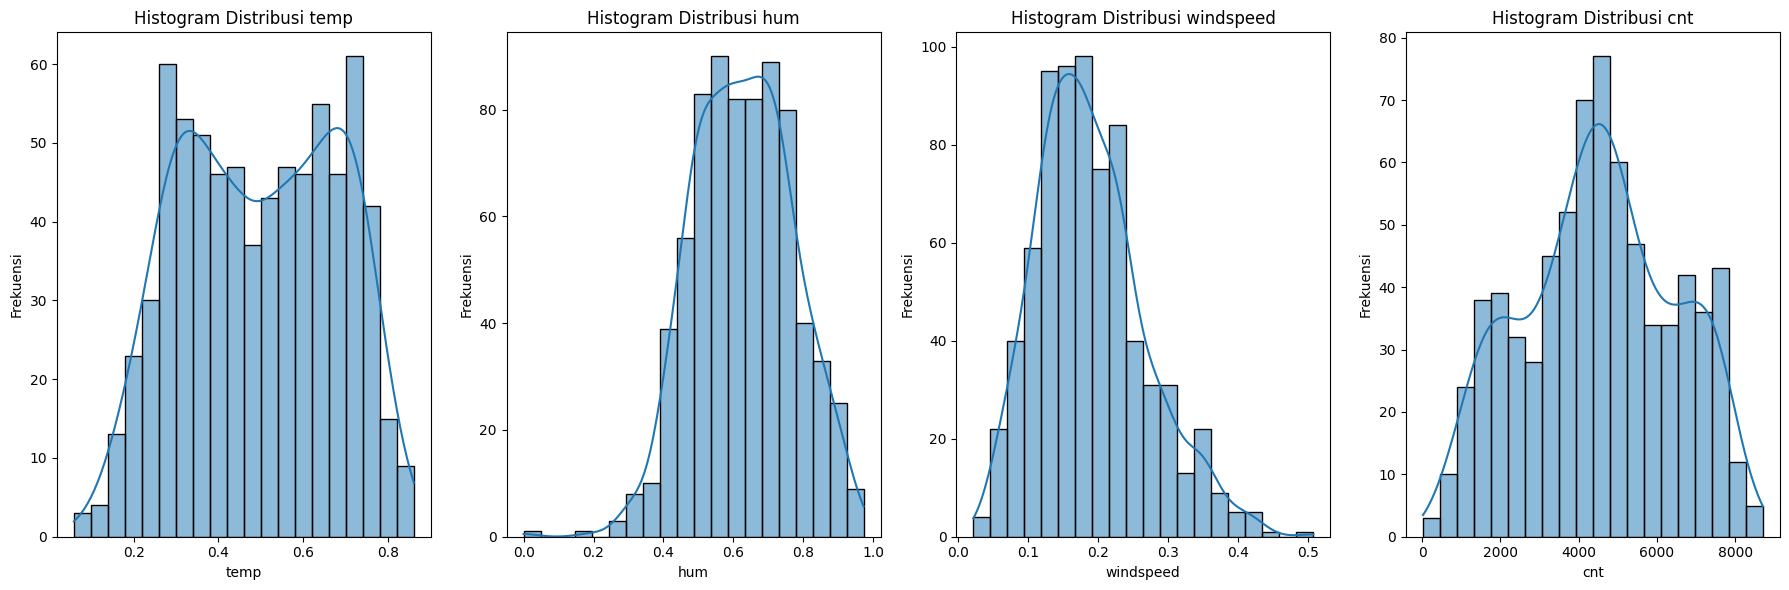

In [13]:
selected_variables = ['temp', 'hum', 'windspeed', 'cnt']
summary_stats_selected = day_df[selected_variables].describe()
print("Ringkasan Statistik dari Variabel Terpilih:\n", summary_stats_selected)

# Visualisasi distribusi data untuk setiap variabel secara horizontal
fig, axes = plt.subplots(nrows=1, ncols=len(selected_variables), figsize=(18, 6))

for i, variable in enumerate(selected_variables):
    sns.histplot(day_df[variable], bins=20, kde=True, ax=axes[i])
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frekuensi')
    axes[i].set_title(f'Histogram Distribusi {variable}')

plt.tight_layout()
plt.show()

####Tren dan pola perubahan penggunaan sepeda dari hari ke hari

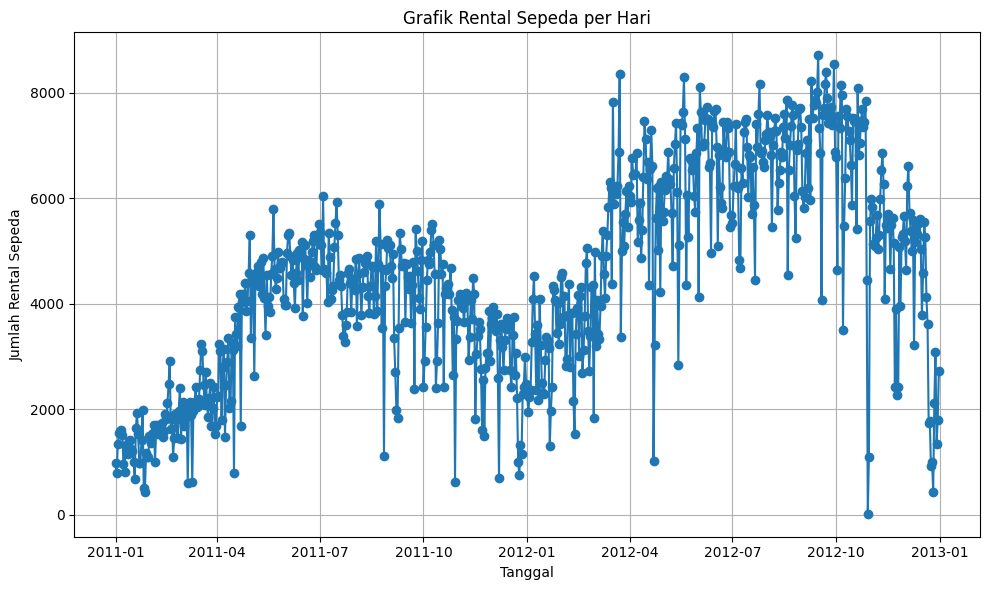

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(day_df['dteday'], day_df['cnt'], marker='o', linestyle='-')

# Konfigurasi plot
plt.title('Grafik Rental Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Rental Sepeda')
plt.grid(True)
plt.tight_layout()

# Tampilkan plot
plt.show()

Berdasarkan dari grafik tersebut terjadi lonjakan penggunaan dimulai pada bulan april hingga oktober

####Korelasi

In [15]:
# Memilih variabel cuaca dan variabel jumlah penggunaan sepeda
weather_variables = ['temp', 'hum', 'windspeed', 'cnt']
weather_df = day_df[weather_variables]

# Menghitung korelasi antar variabel
correlation_matrix = weather_df.corr()

#Print Korelasi
print(correlation_matrix)

               temp       hum  windspeed       cnt
temp       1.000000  0.126963  -0.157944  0.627494
hum        0.126963  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.248489   1.000000 -0.234545
cnt        0.627494 -0.100659  -0.234545  1.000000


jika dilihat variabel paling berpengaruh terhadap jumlah sepeda yang dirental adalah variabel temperatur atau besaran suhu

####Analisis Regresi

In [16]:
X = day_df[['temp', 'hum', 'windspeed']]  # Variabel prediktor (cuaca)
y = day_df['cnt']     # Variabel target (jumlah penggunaan sepeda)

# Inisialisasi model regresi linier
model = LinearRegression()

# Melatih model menggunakan data
model.fit(X, y)

# Menampilkan koefisien dan intercept dari model regresi
print("Koefisien (slope):", model.coef_)
print("Intercept:", model.intercept_)

Koefisien (slope): [ 6625.53270971 -3100.12313491 -4806.92932481]
Intercept: 4084.363384452061


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linier
model = LinearRegression()

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Memprediksi menggunakan data uji
y_pred = model.predict(X_test)

# Evaluasi model menggunakan koefisien determinasi (R-squared) dan mean squared error (MSE)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Koefisien Determinasi (R-squared): {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")

Koefisien Determinasi (R-squared): 0.49606445111931263
Mean Squared Error (MSE): 2020722.2320442528


berdasarkan analisa regresi dapat dinilai bahwa ketiga variabel tersebut yaitu suhu, kelembapan dan kecepatan angin ini memiliki pengaruh sebesar 50% terhadap banyaknya sepeda yang di rental

## Visualization & Explanatory Analysis

### Apakah kondisi cuaca, seperti suhu, kelembapan, atau kecepatan angin, memiliki pengaruh terhadap tingkat penyewaan sepeda? Apakah ada korelasi antara kondisi cuaca tertentu dengan jumlah penggunaan sepeda

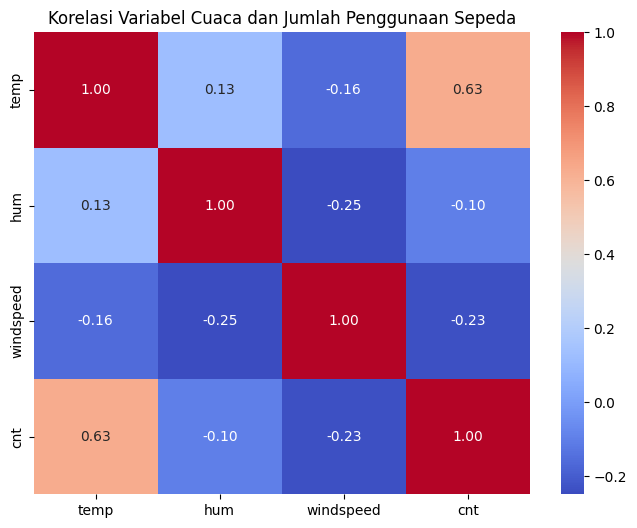

In [18]:
variables = ['temp', 'hum', 'windspeed', 'cnt']
correlation_matrix = day_df[variables].corr()

# Membuat Heatmap Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Variabel Cuaca dan Jumlah Penggunaan Sepeda')
plt.show()

Cuaca memiliki pengaruh besar terhadap jumlah pengguna rental sepeda

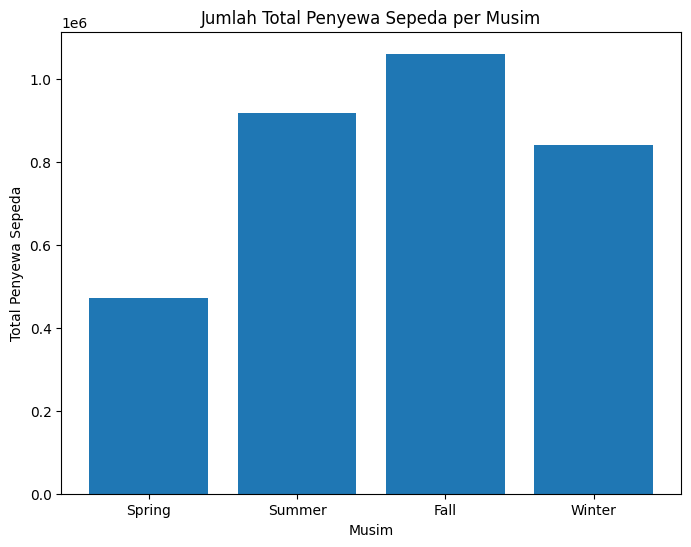

In [19]:
day_df['total_rentals'] = day_df['casual'] + day_df['registered']
rentals_per_season = day_df.groupby('season')['total_rentals'].sum().reset_index()

# Mengubah label musim dari angka menjadi teks
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
rentals_per_season['season'] = rentals_per_season['season'].map(season_dict)

# Plotting bar chart untuk jumlah total penyewa sepeda per musim
plt.figure(figsize=(8, 6))
plt.bar(rentals_per_season['season'], rentals_per_season['total_rentals'])
plt.xlabel('Musim')
plt.ylabel('Total Penyewa Sepeda')
plt.title('Jumlah Total Penyewa Sepeda per Musim')
plt.show()

dan musim dengan paling banyak penggunanya adalah musim panas dan musim gugur

### Bagaimana perbedaan penyewaan sepeda antara hari libur dan hari kerja ini dapat mempengaruhi strategi pemasaran atau operasional terkait dengan penyediaan sepeda selama hari libur dan hari kerja:

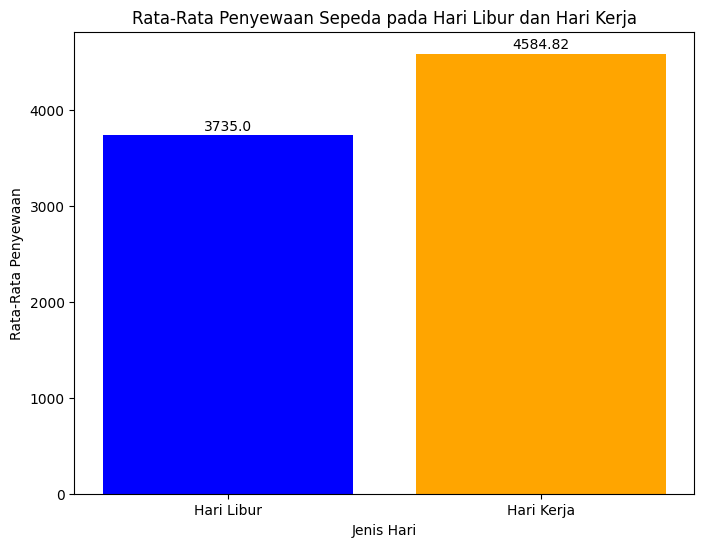

In [20]:
# Pisahkan data untuk hari libur dan hari kerja
holiday_data = day_df[day_df['holiday'] == 1]
workingday_data = day_df[day_df['workingday'] == 1]

# Hitung rata-rata penyewaan pada hari libur dan hari kerja
avg_rentals_holiday = holiday_data['cnt'].mean()
avg_rentals_workingday = workingday_data['cnt'].mean()

# Visualisasi menggunakan plot bar
plt.figure(figsize=(8, 6))
bars = plt.bar(['Hari Libur', 'Hari Kerja'], [avg_rentals_holiday, avg_rentals_workingday], color=['blue', 'orange'])

# Menambahkan nilai rata-rata pada setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.title('Rata-Rata Penyewaan Sepeda pada Hari Libur dan Hari Kerja')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-Rata Penyewaan')
plt.show()

In [21]:
percentage_difference = ((avg_rentals_holiday - avg_rentals_workingday) / avg_rentals_workingday) * 100

# Menampilkan selisih persentase dalam print statement
print(f'Selisih persentase rata-rata penyewaan sepeda pada hari libur dan hari kerja: {round(percentage_difference, 2)}%')

Selisih persentase rata-rata penyewaan sepeda pada hari libur dan hari kerja: -18.54%


penyewa sepeda lebih banyak menggunakan sepeda pada hari kerja dengan selisih sebesar 18,45%

## Conclusion

####Apakah kondisi cuaca, seperti suhu, kelembapan, atau kecepatan angin, memiliki pengaruh terhadap tingkat penyewaan sepeda? Apakah ada korelasi antara kondisi cuaca tertentu dengan jumlah penggunaan sepeda


*   diantara variabel berhubungan dengan cuaca yang paling besar pengaruhnya adalah variabel suhu sebesar 63%
*   Cuaca memiliki faktor yang besar untuk pengaruh jumlah pengguna rental sepeda





####Bagaimana perbedaan penyewaan sepeda antara hari libur dan hari kerja ini dapat mempengaruhi strategi pemasaran atau operasional terkait dengan penyediaan sepeda selama hari libur dan hari kerja


*   Penyewa Sepeda menggunakan sepeda lebih banyak pada hari kerja dibandingkan dengan hari libur
*   Dapat Menjadi Acuan jika ingin melakukan promosi dengan menargetkan kepada para pekerja atau anak sekolah yang menyewa sepeda

